<a href="https://colab.research.google.com/github/LcsGondra/Bloco-Dados/blob/master/TP2_model_lifecycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

# print(iris.DESCR)
# print(iris.target_names)
# print(iris.feature_names)

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['target'] = iris.target

<Axes: >

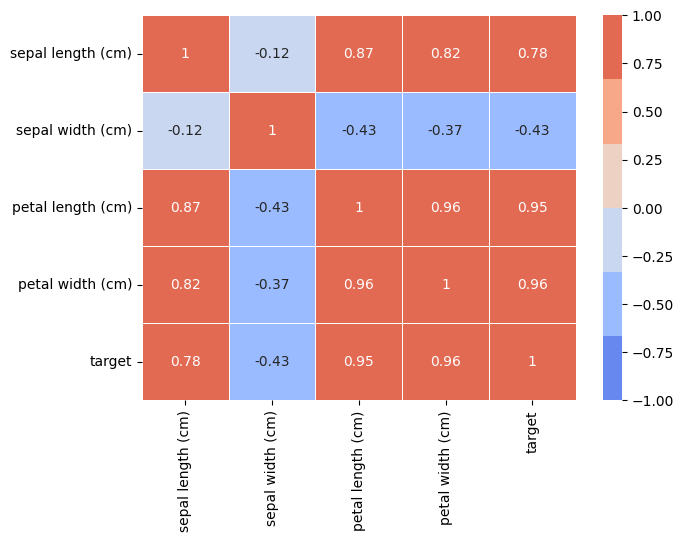

In [6]:
corr = df.corr()
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, vmin=-1, vmax=1, cmap=sns.color_palette("coolwarm"),linewidths=.5, annot=True)

In [7]:
y = df.target
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

X = df[feature_names]

hist normal

<Axes: xlabel='petal width (cm)', ylabel='Count'>

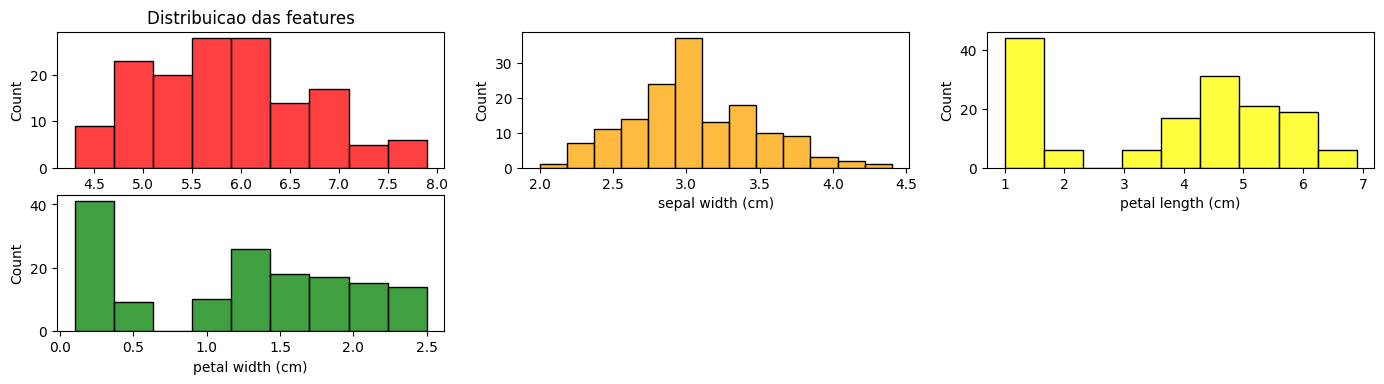

In [8]:
fig = plt.figure(figsize=(17,6))
ax = fig.add_subplot(331)
ax.set_title("Distribuicao das features")
sns.histplot(df['sepal length (cm)'], color='red', ax=ax)
ax = fig.add_subplot(332)
sns.histplot(df['sepal width (cm)'], color='orange',ax=ax)
ax = fig.add_subplot(333)
sns.histplot(df['petal length (cm)'], color='yellow',ax=ax)
ax = fig.add_subplot(334)
sns.histplot(df['petal width (cm)'], color='green',ax=ax)

hist com standard scaler

In [9]:
from sklearn.preprocessing import StandardScaler
df_std = df.copy()

std_scaler = StandardScaler()
df_std[feature_names] = std_scaler.fit_transform(df_std[feature_names])
# df_std.head()

hist com power transformer

<Axes: xlabel='petal width (cm)', ylabel='Count'>

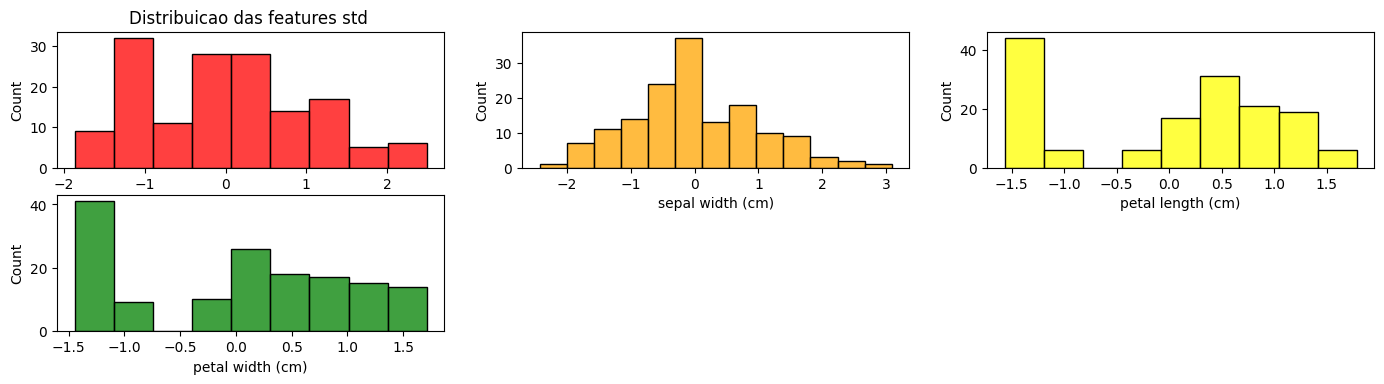

In [10]:
fig = plt.figure(figsize=(17,6))
ax = fig.add_subplot(331)
ax.set_title("Distribuicao das features std ")
sns.histplot(df_std['sepal length (cm)'], color='red', ax=ax)
ax = fig.add_subplot(332)
sns.histplot(df_std['sepal width (cm)'], color='orange',ax=ax)
ax = fig.add_subplot(333)
sns.histplot(df_std['petal length (cm)'], color='yellow',ax=ax)
ax = fig.add_subplot(334)
sns.histplot(df_std['petal width (cm)'], color='green',ax=ax)

In [11]:
from sklearn.preprocessing import PowerTransformer

df_power = df.copy()
pt = PowerTransformer()
df_power[feature_names] = pt.fit_transform(df_power[feature_names])

<Axes: xlabel='petal width (cm)', ylabel='Count'>

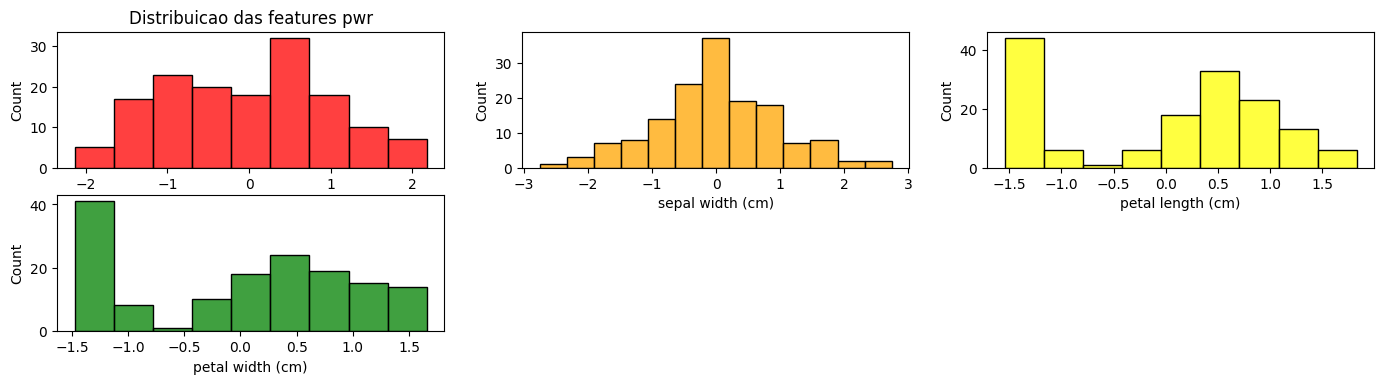

In [12]:
fig = plt.figure(figsize=(17,6))
ax = fig.add_subplot(331)
ax.set_title("Distribuicao das features pwr")
sns.histplot(df_power['sepal length (cm)'], color='red', ax=ax)
ax = fig.add_subplot(332)
sns.histplot(df_power['sepal width (cm)'], color='orange',ax=ax)
ax = fig.add_subplot(333)
sns.histplot(df_power['petal length (cm)'], color='yellow',ax=ax)
ax = fig.add_subplot(334)
sns.histplot(df_power['petal width (cm)'], color='green',ax=ax)

In [13]:
y = df_power.target
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

X = df_power[feature_names]

In [14]:
y = df_std.target
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

X = df_std[feature_names]

In [15]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y ,test_size=0.3, random_state=64)

KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=7)

In [17]:
from sklearn.metrics import accuracy_score

knn_pred_train_y = knn.predict(train_X)
knn_pred_test_y = knn.predict(test_X)

knn_train_accuracy = accuracy_score(train_y, knn_pred_train_y)
knn_test_accuracy = accuracy_score(test_y, knn_pred_test_y)
print("knn train Accuracy:", knn_train_accuracy)
print("knn test Accuracy:", knn_test_accuracy)

knn train Accuracy: 0.9809523809523809
knn test Accuracy: 0.9555555555555556


otimizando o N

In [18]:
train_accuracies = []
test_accuracies = []

neighbors_settings = range(1, 20)

In [19]:
for n in neighbors_settings:
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(train_X, train_y)

  knn_pred_train_y = knn.predict(train_X)
  knn_pred_test_y = knn.predict(test_X)

  train_accuracies.append(accuracy_score(train_y, knn_pred_train_y))
  test_accuracies.append(accuracy_score(test_y, knn_pred_test_y))

# print(f'''{len(train_accuracies)}
# {len(test_accuracies)}''')

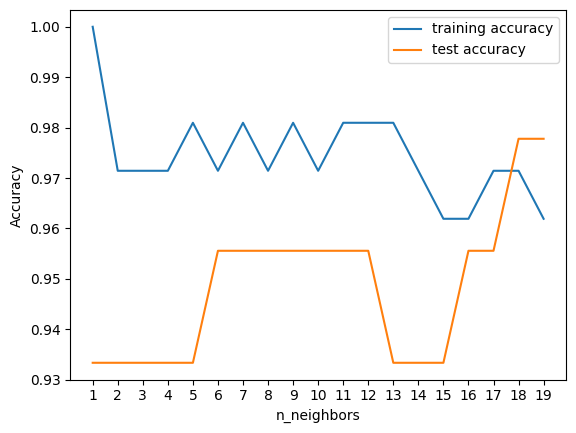

In [20]:
plt.plot(neighbors_settings, train_accuracies, label="training accuracy")
plt.plot(neighbors_settings, test_accuracies, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.xticks(range(1,20))
plt.legend()

Naive-Bayes

In [21]:
y = df.target
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

X = df[feature_names]

In [22]:
# y = df_power.target
# feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# X = df_power[feature_names]

In [23]:
# y = df_std.target
# feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# X = df_std[feature_names]

In [24]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y ,test_size=0.2, random_state=64)

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB

multi = MultinomialNB()
gauss = GaussianNB()
bern = BernoulliNB()
comp = ComplementNB()
cat = CategoricalNB()

nbs = [multi, gauss ,bern ,comp ,cat]
nbs_names = ['multi', 'gauss' ,'bern' ,'comp' ,'cat']

In [26]:
train_accuracies = []
test_accuracies = []

for nb in nbs:
  nb.fit(train_X, train_y)
  nb_pred_train_y = nb.predict(train_X)
  nb_pred_test_y = nb.predict(test_X)

  train_accuracies.append(accuracy_score(train_y, nb_pred_train_y))
  test_accuracies.append(accuracy_score(test_y, nb_pred_test_y))

# print("nb train Accuracy:", nb_train_accuracy)
# print("nb test Accuracy:", nb_test_accuracy)

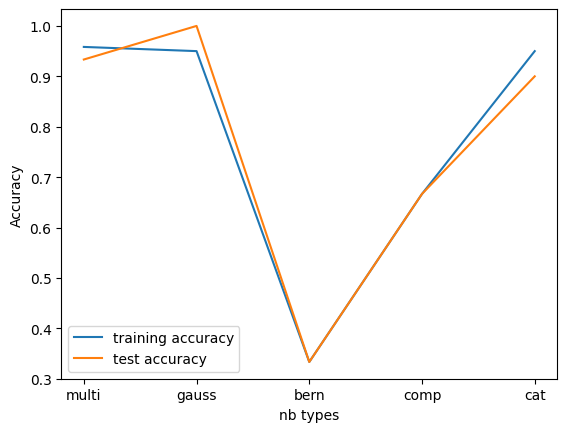

In [27]:
plt.plot(nbs_names, train_accuracies, label="training accuracy")
plt.plot(nbs_names, test_accuracies, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("nb types")
plt.xticks(nbs_names)
plt.legend()

multi fica sendo a melhor opcao

com entradas novas:

In [28]:
new_X =[[5.8, 3.1, 3.4, 1.2],
 [5.0, 3.6, 1.3, 0.4],
 [6.3, 2.9, 5.3, 2.4],
 [4.8, 3.1, 1.5, 0.3],
 [6.4, 3.4, 5.1, 1.9],
 [5.4, 2.8, 3.3, 1.5]]

KNN

In [29]:
knn_pred_new_y = knn.predict(new_X)

print("new entries classification:", [iris.target_names[x] for x in knn_pred_new_y])

new entries classification: ['virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Naive-Bayes

In [30]:
multi.fit(train_X, train_y)
nb_pred_train_y = multi.predict(train_X)
nb_pred_test_y = multi.predict(test_X)

In [31]:
nb_predict_new_y = multi.predict(new_X)

print("new entries classification:", [iris.target_names[x] for x in nb_predict_new_y])

new entries classification: ['versicolor', 'setosa', 'virginica', 'setosa', 'virginica', 'versicolor']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


Dataset Mobile

In [48]:
mobile_test = pd.read_csv('/content/drive/MyDrive/bloco machine learning/mobile_test.csv')
mobile_train = pd.read_csv('/content/drive/MyDrive/bloco machine learning/mobile_train.csv')

In [49]:
mobile_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [50]:
mobile_feats = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']

transform antes da corr

In [51]:
y = mobile_train.price_range
X = mobile_train[mobile_feats]

In [53]:
from sklearn.preprocessing import StandardScaler

mobile_scaled = mobile_train.copy()
scl = StandardScaler()
mobile_scaled[mobile_feats] = scl.fit_transform(X)


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=64)

<Axes: >

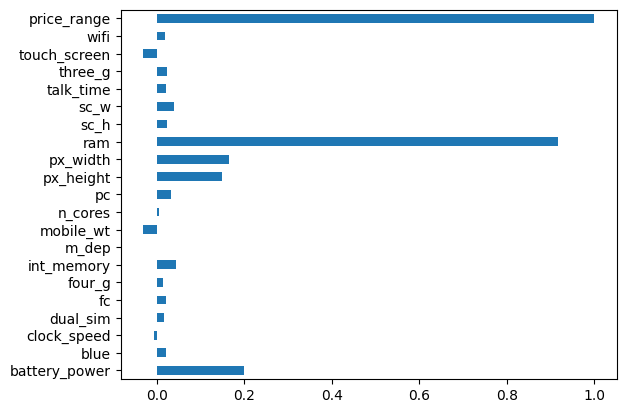

In [54]:
corr_scaled = mobile_scaled.corr()
corr_scaled.price_range.plot.barh(x='mobile_feats')

os mais relevantes depois da transformacao sao memoria ram, resolucao, e bateria. os com menos relevancia sao clock_speed, n_cores e m_dep, sem diferenca significativas entre as normalizacoes, entao irei usar o standard scaler como padrao.

In [55]:
relevant_feats = ['battery_power', 'px_height', 'px_width', 'ram']
minimal_feats = ['battery_power', 'blue', 'dual_sim', 'fc', 'four_g', 'int_memory', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']

X_relevant = X_train[relevant_feats]
X_minimal = X_train[minimal_feats]

In [60]:
train_accuracies = []
test_accuracies = []

neighbors_settings = range(1, 30)

In [61]:
for n in neighbors_settings:
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_relevant, y_train)

  knn_pred_train_y = knn.predict(X_relevant)
  knn_pred_test_y = knn.predict(X_test[relevant_feats])

  train_accuracies.append(accuracy_score(y_train, knn_pred_train_y))
  test_accuracies.append(accuracy_score(y_test, knn_pred_test_y))


In [58]:
# for n in neighbors_settings:
#   knn = KNeighborsClassifier(n_neighbors=n)
#   knn.fit(X_minimal, y_train)

#   knn_pred_train_y = knn.predict(X_minimal)
#   knn_pred_test_y = knn.predict(X_test[minimal_feats])

#   train_accuracies.append(accuracy_score(y_train, knn_pred_train_y))
#   test_accuracies.append(accuracy_score(y_test, knn_pred_test_y))


In [ ]:
plt.plot(neighbors_settings, train_accuracies, label="training accuracy")
plt.plot(neighbors_settings, test_accuracies, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.xticks(range(1,30))
plt.legend()

In [ ]:
plt.plot(neighbors_settings, train_accuracies, label="training accuracy")
plt.plot(neighbors_settings, test_accuracies, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.xticks(range(1,30))
plt.legend()

knn regressao

In [120]:
mobile_feats = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']

y = mobile_scaled.ram
X = mobile_scaled[mobile_feats]

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=64)

In [122]:
relevant_feats = ['battery_power', 'px_height', 'px_width', 'price_range']
minimal_feats = ['battery_power', 'blue', 'dual_sim', 'fc', 'four_g', 'int_memory',
                 'mobile_wt', 'pc', 'px_height', 'px_width', 'price_range', 'sc_h',
                 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']

X_relevant = X_train[relevant_feats]
X_minimal = X_train[minimal_feats]

In [126]:
from sklearn.neighbors import KNeighborsRegressor

train_r2 = []
test_r2 = []

for n in neighbors_settings:
  knn = KNeighborsRegressor(n_neighbors=n)
  knn.fit(X_relevant, y_train)

  knn_pred_train_y = knn.predict(X_relevant)
  knn_pred_test_y = knn.predict(X_test[relevant_feats])

  train_r2.append(knn.score(X_relevant, y_train))
  test_r2.append(knn.score(X_test[relevant_feats], y_test))


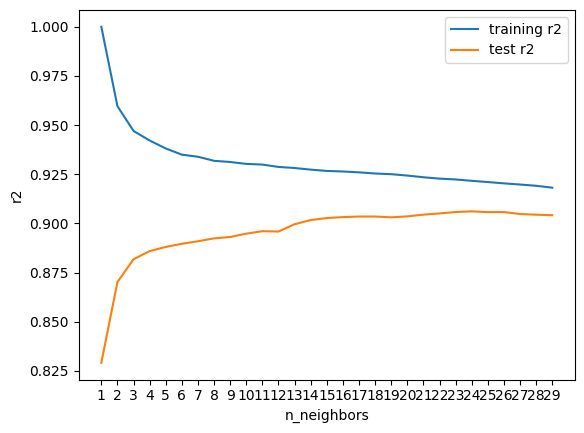

In [127]:
plt.plot(neighbors_settings, train_r2, label="training r2")
plt.plot(neighbors_settings, test_r2, label="test r2")
plt.ylabel("r2")
plt.xlabel("n_neighbors")
plt.xticks(range(1,30))
plt.legend()